In [ ]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import gym

def get_best_action(hand_val, dealer_card, usable_ace):
    state = (hand_val, dealer_card, usable_ace)

    # Compute Q(state, True)
    if num_games[(state,True)] == 0:
      Q_state_true = 0
    else:
      Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
    
    # Compute Q(state, False)
    if num_games[(state,False)] == 0:
      Q_state_false = 0
    else:
      Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

    return Q_state_true >= Q_state_false

def make_subplot(ax, usable_ace):
    x_coords = np.arange(1, 11) # dealer's cards
    y_coords = np.arange(11, 22) # gambler's hand values
    Z = np.array([[get_best_action(y, x, usable_ace) for x in x_coords] for y in y_coords])
    surf = ax.imshow(Z, cmap=plt.get_cmap('Set1', 2), extent=[0.5, 10.5, 21.5, 10.5])
    plt.xticks(x_coords)
    plt.yticks(y_coords)
    plt.gca().invert_yaxis()
    ax.set_xlabel('Dealer Showing')
    ax.set_ylabel('Player Sum')
    col1_patch = mpatches.Patch(color='darkgray', label='Hit')
    col2_patch = mpatches.Patch(color='red', label='Stick')
    plt.legend(handles=[col1_patch, col2_patch])

def plot_strategy():
  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(121)
  ax.set_title('Usable Ace')
  make_subplot(ax, True)
  ax = fig.add_subplot(122)
  ax.set_title('No Usable Ace')
  make_subplot(ax, False)
  plt.show()
  

In [ ]:
blackjack = gym.make('Blackjack-v1')

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
initial_state = blackjack.reset()

print("Starting state:", initial_state)
print("Hand value:", initial_state[0])
print("Dealer's card:", initial_state[1])
print("Useable ace?:", initial_state[2])

Starting state: (20, 1, False)
Hand value: 20
Dealer's card: 1
Useable ace?: False


In [ ]:
hit = True
stick = False

In [ ]:
next_state, reward, game_over, _ = blackjack.step(hit)
print("Action: Hit")
print("Resulting State:", next_state)
print("Reward:", reward)
print("Game over?:", game_over)

Action: Hit
Resulting State: (22, 1, False)
Reward: -1.0
Game over?: True


In [ ]:
initial_state = blackjack.reset()

print("Hand value:", initial_state[0])
print("Dealer's card:", initial_state[1])
print("Useable ace?:", initial_state[2])

Hand value: 12
Dealer's card: 8
Useable ace?: False


In [ ]:
next_state, reward, game_over, _ = blackjack.step(hit)

print("Hand value:", next_state[0])
print("Dealer's card:", next_state[1])
print("Useable ace?:", next_state[2])
print("-----")
print("Reward:", reward)
print("Game over?:", game_over)

Hand value: 22
Dealer's card: 8
Useable ace?: False
-----
Reward: -1.0
Game over?: True


In [ ]:
next_state, reward, game_over, _ = blackjack.step(stick)

print("Hand value:", next_state[0])
print("Dealer's card:", next_state[1])
print("Useable ace?:", next_state[2])
print("-----")
print("Reward:", reward)
print("Game over?:", game_over)

Hand value: 22
Dealer's card: 8
Useable ace?: False
-----
Reward: -1.0
Game over?: True


In [ ]:
my_counter = Counter()
my_counter["hello"] = 1
my_counter["world"] = 2
print(my_counter)

Counter({'world': 2, 'hello': 1})


In [ ]:
print(my_counter["new_word"])

0


In [ ]:
my_counter = Counter()
my_counter['A'] = 3
my_counter['C'] = 1
my_counter['M'] = 1
my_counter['R'] = 2
my_counter['Y'] = 1

print(my_counter['A'] + my_counter['M'] + my_counter['S'])

4


In [ ]:
sum_rewards = Counter()
num_games = Counter()

In [ ]:
def update_counters(game):

  reward = game[-1]
  for idx in range(len(game) - 1):
    state_action_tuple = game[idx]
    sum_rewards[state_action_tuple] += reward
    num_games[state_action_tuple] += 1


In [ ]:
def best_action(state):

  # Compute Q(state, True)
  if num_games[(state,True)] == 0:
    Q_state_true = 0
  else:
    Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
  
  # Compute Q(state, False)
  if num_games[(state,False)] == 0:
    Q_state_false = 0
  else:
    Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

  return Q_state_true >= Q_state_false


In [ ]:
def epsilon_greedy(state, epsilon):

  action = best_action(state)

  # Return best_action with probability 1-epsilon
  if np.random.binomial(n=1,p=1-epsilon):
    return action
  
  # Otherwise, return random action
  else:
    return np.random.binomial(n=1,p=0.5)


In [ ]:
def play_blackjack(epsilon):

  game = []
  state = blackjack.reset()
  game_over = False
  while game_over == False:
      action = epsilon_greedy(state, epsilon)
      next_state, reward, game_over, _ = blackjack.step(action)
      game.append((state, action))
      state = next_state
      if game_over:
        game.append(reward)    
  return game


In [ ]:
epsilon = 0.15
for iteration in range(10000000):

  game = play_blackjack(epsilon)
  update_counters(game)


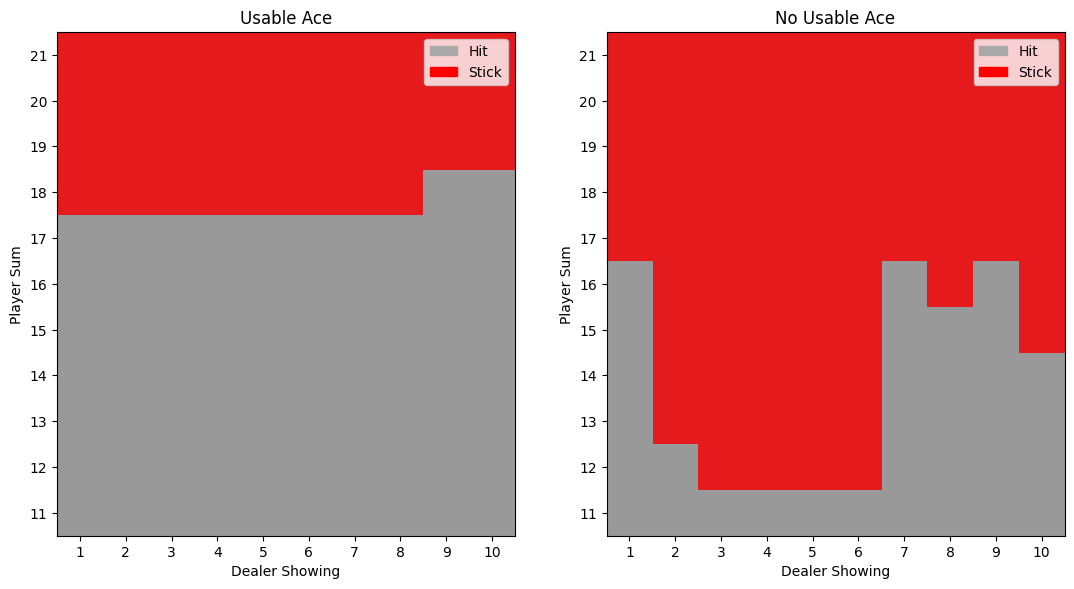

In [ ]:
plot_strategy()